#Username : CT_CSI_DS_2346
#Name : Dhruv Patel

# Importing Libraries

In [95]:
import numpy as np
import pandas as pd



# Importing and understanding the dataset:

In [96]:
tr=pd.read_csv("train.csv")

In [97]:
tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
tr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [99]:
tr.shape

(1460, 81)

In [100]:
tr.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [101]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**We could see columns "Alley, MasVnrType, PoolQC, Fence, MiscFeature" having very few non null values. So we need to remove these columns. FireplaceQu column has 770 non null valuees out of 1460 rows.**

In [102]:
tr1=tr.drop(columns=["Alley", "MasVnrType", "PoolQC", "Fence","Id","MiscFeature"])

In [103]:
tr1["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

**We have 690 null values in "FireplceQu" column, we can't replace all of them with mode, so we are removing this column.**

In [104]:
# Let us also drop some other unnecessary columns which does not have much effect on output
# MoSold, does not have much effect
tr2= tr1.drop(columns=["FireplaceQu","MoSold"])
tr2.shape

(1460, 73)

In [105]:
tr2.dropna(thresh=2)
tr2.shape

(1460, 73)

In [106]:
tr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# Data Preprocessing

In [107]:
#Let us find out the columns with null values
x=[]
for i in range(len(tr2.columns)):
    for j in range(tr2.shape[0]):
        if pd.isna(tr2.iloc[j, i]):
            x.append(tr2.columns[i])
            break
print(x)

['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [108]:
tr2[x].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   GarageType    1379 non-null   object 
 9   GarageYrBlt   1379 non-null   float64
 10  GarageFinish  1379 non-null   object 
 11  GarageQual    1379 non-null   object 
 12  GarageCond    1379 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [109]:
for a in x:
    if tr2[a].dtype in [int, float]:
        tr2[a] = tr2[a].fillna(tr2[a].mean())
    else:
        tr2[a] = tr2[a].fillna(tr2[a].mode()[0])

In [110]:
tr2[x].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   MasVnrArea    1460 non-null   float64
 2   BsmtQual      1460 non-null   object 
 3   BsmtCond      1460 non-null   object 
 4   BsmtExposure  1460 non-null   object 
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtFinType2  1460 non-null   object 
 7   Electrical    1460 non-null   object 
 8   GarageType    1460 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GarageFinish  1460 non-null   object 
 11  GarageQual    1460 non-null   object 
 12  GarageCond    1460 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [111]:
#Replacing the columns with ordinal values.
tr2[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']]=tr2[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']].replace(["Ex","Gd","TA","Fa","Po","NA"],[5,4,3,2,1,0])

In [112]:
tr2[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
0,4,3,4,3,5,4,3,3
1,3,3,4,3,5,3,3,3
2,4,3,4,3,5,4,3,3
3,3,3,3,4,4,4,3,3
4,4,3,4,3,5,4,3,3


In [113]:
tr2[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ExterQual    1460 non-null   int64
 1   ExterCond    1460 non-null   int64
 2   BsmtQual     1460 non-null   int64
 3   BsmtCond     1460 non-null   int64
 4   HeatingQC    1460 non-null   int64
 5   KitchenQual  1460 non-null   int64
 6   GarageQual   1460 non-null   int64
 7   GarageCond   1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


In [114]:
#The difference in the years responsible for the price rather than the year.

tr2['YR_YB']=tr2['YearRemodAdd']-tr2['YearBuilt']
tr2['YS_YR']=tr2['YrSold']-tr2['YearRemodAdd']
tr2['YS_GBY']=tr2['YrSold']-tr2['GarageYrBlt']

In [115]:
tr2.drop(columns=['YearRemodAdd','YearBuilt','YrSold','GarageYrBlt'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,YR_YB,YS_YR,YS_GBY
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,208500,0,5,5.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,181500,0,31,31.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,223500,1,6,7.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,WD,Abnorml,140000,55,36,8.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,WD,Normal,250000,0,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,175000,1,7,8.0
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,210000,10,22,32.0
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2500,WD,Normal,266500,65,4,69.0
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,WD,Normal,142125,46,14,60.0


In [116]:
c=0
for i in tr2.columns:
    if tr2[i].dtype==object:
        c+=1
c

29

In [117]:
z=[]
for i in tr2.columns:
    if tr2[i].dtypes=='object':
        z.append(i)
z

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [118]:
dummies_df=pd.get_dummies(tr2[z])
dummies_df = dummies_df.astype(int)

In [119]:
dummies_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [120]:
tr3 = pd.concat([tr2, dummies_df], axis=1)

In [121]:
tr4=tr3.drop(columns=z)
#Removing one-hot encoded columns

In [122]:
tr4.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,3,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,3,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,3,...,0,0,0,1,0,0,0,0,1,0


In [123]:
tr4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 241 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(4), int64(237)
memory usage: 2.7 MB


# Data Visualization and outlier removal

<ipython-input-124-9c3c1dc333b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr4['LotArea'])


<Axes: xlabel='LotArea', ylabel='Density'>

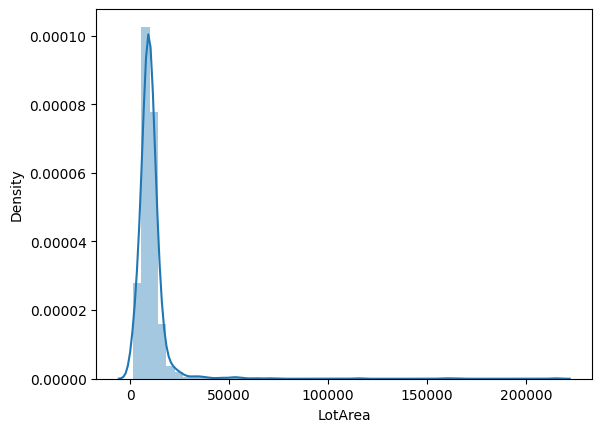

In [124]:
import seaborn as sns
sns.distplot(tr4['LotArea'])

In [125]:
tr4['LotArea'].skew()

12.207687851233496

<Axes: ylabel='LotArea'>

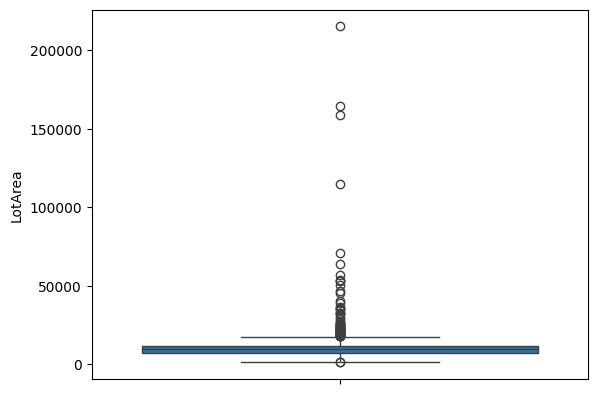

In [126]:
sns.boxplot(tr4['LotArea'])

In [127]:
tr.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

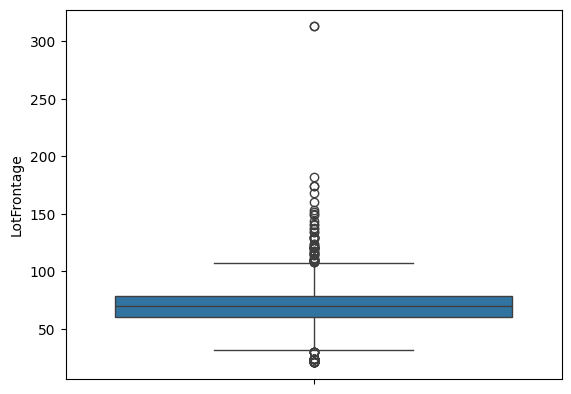

In [128]:
import matplotlib.pyplot as plt
sns.boxplot(tr4['LotFrontage'])
plt.show()

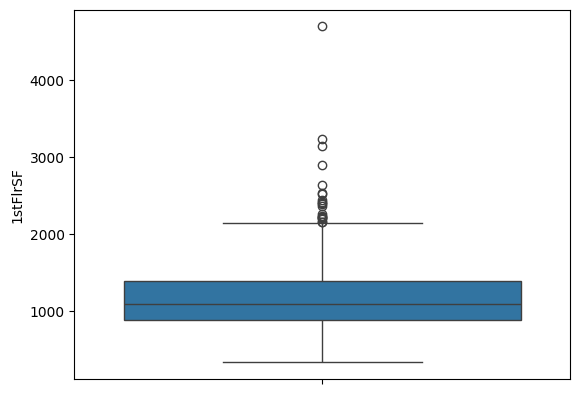

In [129]:
sns.boxplot(tr4['1stFlrSF'])
plt.show()

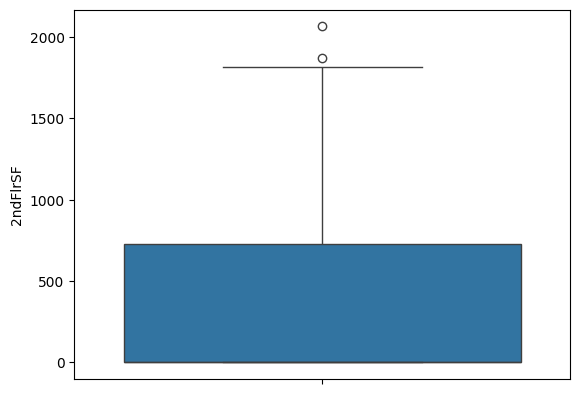

In [130]:
sns.boxplot(tr4['2ndFlrSF'])
plt.show()

# Feature Engineering

In [131]:
tr4.shape

(1460, 241)

In [132]:
tr4['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [133]:
X=tr4.drop(columns=['SalePrice'])
y=tr4['SalePrice']

In [134]:
corr_matrix=X.corr()

In [135]:
columns=corr_matrix.columns

# Feature Engineering

In [136]:
#Let us find the features having correlation more than 0.8
correlation_dict = {}
for i in range(0, 240):
    correlated_features = []#Stores all the correlated feartures of i th column
    for j in range(i + 1, 240):
        if corr_matrix.loc[columns[i], columns[j]] > 0.8:
            correlated_features.append(columns[j])
    if correlated_features:#To store in dictionary only if there exsits correlated features for a feature
        correlation_dict[columns[i]] = correlated_features
correlation_dict

{'TotalBsmtSF': ['1stFlrSF'],
 '2ndFlrSF': ['HouseStyle_2Story'],
 'GrLivArea': ['TotRmsAbvGrd'],
 'GarageCars': ['GarageArea'],
 'MSZoning_FV': ['Neighborhood_Somerst'],
 'RoofStyle_Flat': ['RoofMatl_Tar&Grv'],
 'Exterior1st_AsbShng': ['Exterior2nd_AsbShng'],
 'Exterior1st_CBlock': ['Exterior2nd_CBlock'],
 'Exterior1st_CemntBd': ['Exterior2nd_CmentBd'],
 'Exterior1st_HdBoard': ['Exterior2nd_HdBoard'],
 'Exterior1st_MetalSd': ['Exterior2nd_MetalSd'],
 'Exterior1st_VinylSd': ['Exterior2nd_VinylSd'],
 'Exterior1st_Wd Sdng': ['Exterior2nd_Wd Sdng'],
 'SaleType_New': ['SaleCondition_Partial']}

We can only remove 13 features through feature selection

In [137]:
modified_values = [value[0] for value in correlation_dict.values()]

In [138]:
X=X.drop(columns=modified_values)

In [139]:
X.shape

(1460, 226)

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [141]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [142]:
X_scaled

array([[ 0.07337496, -0.22937175, -0.20714171, ..., -0.09103457,
        -0.11785113,  0.4676514 ],
       [-0.87256276,  0.4519361 , -0.09188637, ..., -0.09103457,
        -0.11785113,  0.4676514 ],
       [ 0.07337496, -0.09311018,  0.07347998, ..., -0.09103457,
        -0.11785113,  0.4676514 ],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ..., -0.09103457,
        -0.11785113,  0.4676514 ],
       [-0.87256276, -0.09311018, -0.08016039, ..., -0.09103457,
        -0.11785113,  0.4676514 ],
       [-0.87256276,  0.22483348, -0.05811155, ..., -0.09103457,
        -0.11785113,  0.4676514 ]])

In [143]:
pca = PCA(n_components=125)
X_pca = pca.fit_transform(X_scaled)

In [144]:
explained_variance = pca.explained_variance_ratio_.sum()#Captures the total variance captured by 125 features of total variance

In [145]:
explained_variance

0.8845390381128718

# Splitting the data into training validation sets

In [146]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2,random_state=18)

In [147]:
X_train.shape

(1168, 125)

# Lasso Regression

As we have more features and less number of correlated features, we can go with lasso regression which sets irrelevant feature coefficients to zero, simplifies the model and helps prevent overfitting.

Ridge Regression is particularly effective when you have many correlated features because it distributes the impact of correlated features across all of them, rather than selecting one and ignoring others.(As we removed the correlated features, there is no need of using this)

In [148]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1,max_iter=100000)
lasso.fit(X_train, y_train)

Lasso(alpha=1, max_iter=100000)

In [149]:
y_val_pred = lasso.predict(X_val)

In [150]:
y_val_pred

array([255439.72758043, 112158.16549335, 220871.57701854, 187097.72413344,
        79248.18675133, 248639.31363158, 228410.31402033, 309881.32582246,
       231508.09518035, 217911.9695832 , 223064.30722472, 125770.48258502,
       137644.12546823, 169911.6519664 , 261946.24064405, 140853.38030315,
        92574.79141728, 162833.84352059, 158652.37941257, 214563.35065954,
       228955.01857378, 150986.05716052, 336018.51275404, 118758.81728974,
       326997.13582973, 244564.27630749, 141182.03073119, 103549.54709635,
       205257.56112274, 177601.96656322, 113891.59627343, 130556.13155898,
       191107.06704639, 137348.40948781, 293092.86403406, 140682.54855759,
       109052.04950934, 172234.19068799, 137386.34809828, 219613.55245447,
       198103.78829361, 297692.91221045, 228952.52897767, 194183.67353793,
       304647.89857581, 273996.62078094, 270888.73288821, 136061.48243804,
       153969.60999019, 235242.60649939,  43441.86373643,  80343.41089745,
       298441.18437225, 2

In [151]:
y_val

1413    257000
666     129000
885     328900
993     173900
788     107900
         ...  
563     185000
1071    154000
260     176000
263     130000
772     107000
Name: SalePrice, Length: 292, dtype: int64

In [152]:
lasso.coef_

array([ 1.51495716e+04,  1.11948061e+01,  1.30063765e+04, -1.42333092e+03,
        1.33596396e+03, -8.68866391e+02,  8.32383076e+03,  6.76526856e+01,
       -2.60695012e+03, -4.17453458e+03, -1.50387440e+03, -7.63492333e+02,
       -1.83184832e+03, -4.13525757e+01, -5.19944016e+02,  3.43794338e+03,
       -2.06505665e+02, -5.18863455e+02, -1.70874646e+03,  2.50496224e+03,
       -2.95203626e+02,  1.13530912e+03, -3.68100080e+03,  3.23086016e+01,
        5.20141126e+03, -5.73136723e+03, -2.79807745e+03,  1.83858861e+03,
        8.83100426e+02, -3.80943133e+01,  5.73174827e+02, -4.87718088e+03,
       -2.17047260e+03, -1.55738782e+02,  1.06686226e+03,  2.44884298e+03,
       -2.21492296e+02, -9.51247939e+02, -2.43637358e+03, -2.28859381e+03,
       -1.00640615e+03, -3.34551362e+03, -1.55802475e+03, -2.11518250e+03,
        8.31706902e+02, -2.07003567e+03, -5.94075789e+02,  8.25706957e+02,
       -1.72374555e+03, -2.13786220e+03,  1.64326220e+02,  8.69905665e+02,
        1.55366749e+02,  

In [153]:
lasso.intercept_

180808.12835210527

# Evaluating Lasso Regression

R2 score is the proportion of the variance in the dependent variable (target) is explained by the independent variables (features).
Very high R2 score may indicates the good fit and it may also cause overfitting.

The adjusted R2 metric addresses a key limitation of the regular R2 metric, which is its tendency to increase with the addition of more predictors (independent variables), regardless of their actual contribution to explaining the variance in the dependent variable.

In [154]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [155]:
#Evaluating the Lasso Regression through  MSE and Adjusted R2 score
r2 = r2_score(y_val, y_val_pred)
n = len(y_val)
k = X_val.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
adjusted_r2

0.7639255106719862

In [156]:
mse = mean_squared_error(y_val, y_val_pred)
mse

875280901.5402025

In [157]:
mae=mean_absolute_error(y_val, y_val_pred)
mae

20239.865471995778

# Support Vector Regression

In [158]:
from sklearn.svm import SVR

C_values = [0.1, 1, 10]
MSE=[]
MAE=[]
Adjusted_R2=[]

for c in C_values:
    svr=SVR(C=c, epsilon=1,kernel='linear')
    svr.fit(X_train,y_train)
    y_val_pred = svr.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    MSE.append(mse)
    mae= mean_absolute_error(y_val, y_val_pred)
    MAE.append(mae)
    r2 = r2_score(y_val, y_val_pred)
    n = len(y_val)
    k = X_val.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    Adjusted_R2.append(adjusted_r2)

In [159]:
print(f"MSE : {MSE}\nMAE : {MAE}\nAdjusted_R2 : {Adjusted_R2}")

MSE : [6804369085.477421, 5459484768.058382, 2011051424.611214]
MAE : [55147.249700433546, 47112.292856856046, 24763.37652531119]
Adjusted_R2 : [-0.8352256449635622, -0.47249308918487176, 0.4575936282374592]


# K-Nearest Neighbours

In [160]:
from sklearn.neighbors import KNeighborsRegressor

MSE_K=[]
MAE_K=[]
Adjusted_R2_K=[]

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    MSE_K.append(mse)
    mae= mean_absolute_error(y_val, y_val_pred)
    MAE_K.append(mae)
    r2 = r2_score(y_val, y_val_pred)
    n = len(y_val)
    k = X_val.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    Adjusted_R2_K.append(adjusted_r2)

In [161]:
print(f"MSE : {MSE_K}\nMAE : {MAE_K}\nAdjusted_R2 : {Adjusted_R2_K}")

MSE : [1656345056.9520547, 1800586322.2046232, 1719190720.481735, 1681745321.3737156, 1632223813.520959, 1639287275.4799278, 1546945247.460232, 1562949585.6378424, 1582294435.5117116, 1632582870.6231163]
MAE : [28949.102739726026, 27633.23116438356, 26547.310502283104, 25576.99315068493, 25371.933561643833, 25046.128424657534, 24407.683463796475, 24642.36301369863, 24785.91514459665, 25018.779794520546]
Adjusted_R2 : [0.5532624866110183, 0.514358766702807, 0.536312204823603, 0.5464117094015664, 0.5597682954489951, 0.5578631891317922, 0.5827690188715966, 0.5784524435234268, 0.5732348893107567, 0.5596714531417061]


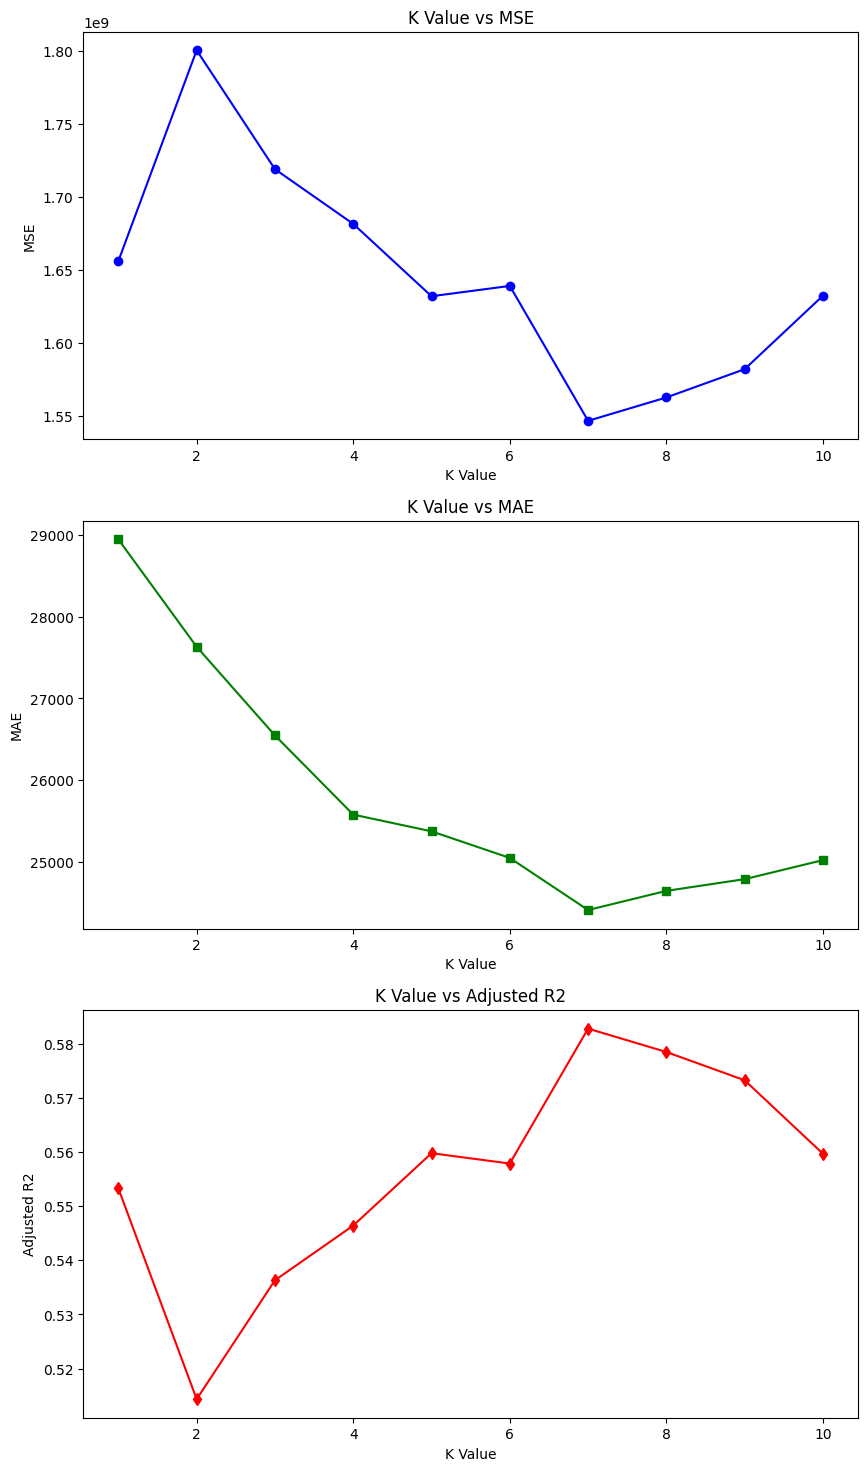

In [162]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18)) #axs represents subplot and fig represents entire figure or window

# Plotting MSE vs K Value
axs[0].plot(np.arange(1,11,1), MSE_K, marker='o', linestyle='-', color='b')
axs[0].set_xlabel('K Value')
axs[0].set_ylabel('MSE')
axs[0].set_title('K Value vs MSE')

# Plotting MAE vs K Value
axs[1].plot(np.arange(1,11,1), MAE_K, marker='s', linestyle='-', color='g')
axs[1].set_xlabel('K Value')
axs[1].set_ylabel('MAE')
axs[1].set_title('K Value vs MAE')

# Plotting Adjusted R2 vs K Value
axs[2].plot(np.arange(1,11,1), Adjusted_R2_K, marker='d', linestyle='-', color='r')
axs[2].set_xlabel('K Value')
axs[2].set_ylabel('Adjusted R2')
axs[2].set_title('K Value vs Adjusted R2')

plt.show()

So K = 7 we are getting the best results

In [163]:
#Results for K=7
print(f"MSE : {MSE_K[6]}\nMAE : {MAE_K[6]}\nAdjusted_R2 : {Adjusted_R2_K[6]}")

MSE : 1546945247.460232
MAE : 24407.683463796475
Adjusted_R2 : 0.5827690188715966


# Decision Tree Regression

In [164]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(random_state=18)
dt_regr.fit(X_train, y_train)
y_pred_dt = dt_regr.predict(X_val)

In [165]:
mean_squared_error(y_val, y_pred_dt)

1598962613.5171232

In [166]:
mean_absolute_error(y_val, y_pred_dt)

27713.20890410959

In [167]:
print(dt_regr.get_depth())

21


# Random Forest Regression

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_val_pred_rf = rf_regressor.predict(X_val)

In [169]:
mean_squared_error(y_val, y_pred_dt)

1598962613.5171232

In [170]:
mean_absolute_error(y_val, y_pred_dt)

27713.20890410959

In [171]:
r2_rf = r2_score(y_val, y_val_pred_rf)
n = len(y_val)
k = X_val.shape[1]
adjusted_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - k - 1)
adjusted_r2_rf

0.7859553281674756